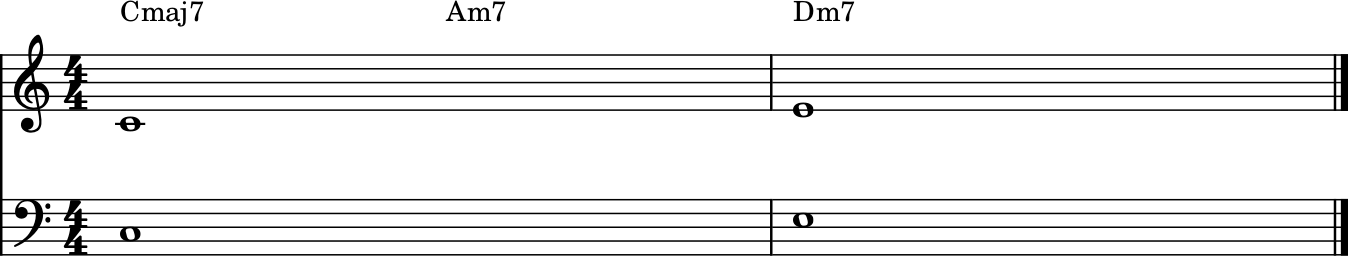

In [17]:
from music21 import *
from IPython.display import Image


def sheet(notes: list, midi=False):
    score = stream.Score()
    
    treble_part = stream.Part()
    treble_part.insert(0, clef.TrebleClef())
    
    treble_part.append(note.Note("C4", quarterLength=4))
    treble_part.append(note.Note("E4", quarterLength=4))
    
    treble_part.insert(0, harmony.ChordSymbol("Cmaj7", quarterLength=2))
    treble_part.insert(2, harmony.ChordSymbol("Am7", quarterLength=2))
    
    treble_part.insert(4, harmony.ChordSymbol("Dm7", quarterLength=4))
    
    score.insert(0, treble_part)
    
    bass_part = stream.Part()
    bass_part.insert(0, clef.BassClef())
    
    bass_part.append(note.Note("C3", quarterLength=4))
    bass_part.append(note.Note("E3", quarterLength=4))
    
    score.insert(0, bass_part)
    
    score.show()

sheet([])

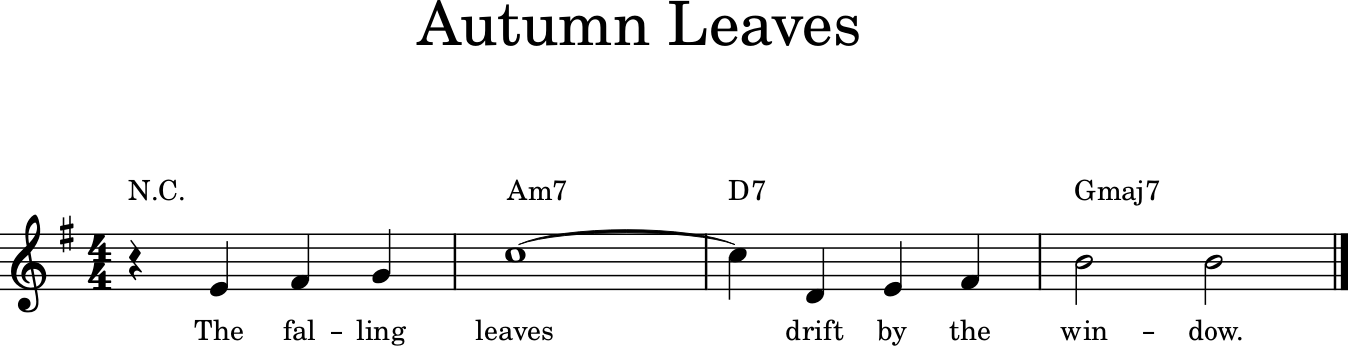

In [59]:
def sheet(music: list, midi=False):
    # Create a main score
    score = stream.Score()
    
    # Get the song title
    song_title = music[0]
    
    # Create and set a metadata object
    md = metadata.Metadata()
    md.title = song_title
    
    # Set the score's title using the metadata
    score.metadata = md
    
    # Create the main part
    main_part = stream.Part()
    
    # Separate the music info
    main_info = music[1][0].split(" ")
    
    # Set the clef
    if main_info[0].lower() == "treble":
        main_part.insert(0, clef.TrebleClef())
    elif main_info[0].lower() == "bass":
        main_part.insert(0, clef.BassClef())
    else:
        main_part.insert(0, clef.NoClef())
    
    # Define key names to ints
    keys = [["cb", -7], ["gb", -6], ["db", -5], ["ab", -4], ["eb", -3], ["bb", -2], ["f", -1], ["c", 0], ["g", 1], ["d", 2], ["a", 3], ["e", 4], ["b", 5], ["f#", 6], ["c#", 7]]
    
    # Set the key
    for k in keys:
        if main_info[1].lower() == k[0]:
            main_part.append(key.KeySignature(k[1]))
    
    # Set the time signature
    main_part.append(meter.TimeSignature(main_info[2]))
    
    # Split the string of note info by spaces
    main_notes = music[2][0].split(" ")
    # Further split by slashes
    for n in range(len(main_notes)):
        main_notes[n] = main_notes[n].split("/")
    
    # Add notes
    for n in main_notes:
        # Set the pitch, length, lyric
        pitch, length, lyric = n[0], n[1], n[2] if len(n) == 3 else ""
        
        # Set tie info
        is_tie = "none"
        if "{" in length:
            is_tie = "start"
            length = length.replace("{", "")
        if "}" in length:
            is_tie = "stop"
            length = length.replace("}", "")
        
        # Convert the note from a string to float
        if length in ["0.3", ".3"]:
            length = 0.333333333
        else:
            length = float(length)
        
        # Set the pitch/rest/slash
        if pitch.lower() == "r":
            add_note = note.Rest(quarterLength=length)
        elif pitch.lower() in ["slash", "s"]:
            add_note = note.Unpitched()
            add_note.notehead = "slash"
            add_note.stemDirection = "noStem"
            add_note.volume.velocity = 0
        else:
            add_note = note.Note(pitch, quarterLength=length)
        
        # Add the lyric
        if lyric != "":
            add_note.lyric = note.Lyric(lyric)
        
        # Set the tie
        if is_tie != "none":
            add_note.tie = tie.Tie(is_tie)
        
        main_part.append(add_note)
    
    # Split the chords
    main_chords = music[3][0].split(" ")
    for c in range(len(main_chords)):
        main_chords[c] = main_chords[c].split("/")
    
    i = 0
    for c in main_chords:
        chord_name, length = c[0], float(c[1])
        if chord_name.lower() != "r":
            main_part.insert(i, harmony.ChordSymbol(chord_name, quarterLength=length))
        else:
            main_part.insert(harmony.NoChord(quarterLength=length))
        i += length
    
    # Add the main part to the score
    score.insert(main_part)
    
    # Show the score
    score.show()


music = [
    "Autumn Leaves",
    ["treble g 4/4"], # clef, key, time
    ["r/1 e4/1/The f#4/1/fal- g4/1/ling c5/4{/leaves c5/1} d4/1/drift e4/1/by f#4/1/the b4/2/win- b4/2/dow."], # notes, lyrics, ties
    ["r/4 am7/4 d7/4 gmaj7/4"] #chords
]

sheet(music)